## 인공신경망 
<h3> $ y(x) = f(\sum_{i=1}^{n}w_{i}x_{i}) $ </h3>

- 활성홤수 
- 망 구조 또는 토폴로지
- 훈련 최적화 알고리즘
- 신경망 응용
    - 이미지와 비디오
    - 텍스트 처리
    - 음성
    - 구조화 데이터 처리

## 활성 함수
- 시그모이드 : $ \sigma(x) = \frac{1}{1+e^{-x}} $ 
- 하이퍼볼릭 탄젠트 $ tanh(x) = 2sigma(2x) - 1 $
- 렐루 : $ f(x) = max(0,x) $
- 선형 : $ f(x) = x $

## 순전파와 역전파(교과서 참조)

## 신경망의 최적화(교과서 참조)
- 확률 경사 하강법
- 모멘텀
- NAG
- 에이다 그래드
- 에이다 델타
- RMS프랍
- 아담
- L-BFGS

## 신경망에서의 드롭아웃
- 과적합을 피하기 위한 정규화 과정

## scikit-learn을 사용해 필기체 숫자 인식에 적용한 ANN 분류기

In [1]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# 데이터 확인
X = digits.data
y = digits.target

In [7]:
# 데이터 shape 확인
X.shape, y.shape

((1797, 64), (1797,))

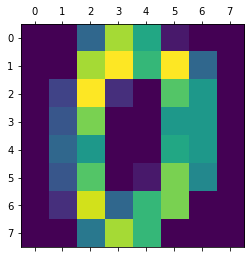

In [11]:
# 숫자 샘플 확인해보기
import matplotlib.pyplot as plt
plt.matshow(X[0].reshape(8,8))
plt.show()

In [12]:
# 스케일링
from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(X)

In [13]:
# train, test 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [14]:
# 그리드 검색 - 인공신경망
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('mlp', MLPClassifier(hidden_layer_sizes = (100,50,), activation = 'relu', solver = 'adam', alpha = 0.0001, max_iter = 300))
])

In [15]:
# 파라미터 생성
parameters = {
    'mlp__alpha' : (0.001, 0.01, 0.1, 0.3, 0.5, 1.0),
    'mlp__max_iter' : (100,200,300)
}

In [16]:
# 모델 생성
grid_search_nn = GridSearchCV(
    pipeline,
    parameters,
    n_jobs = -1,
    cv = 5,
    verbose = 1,
    scoring = 'accuracy'
)
grid_search_nn.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   47.8s finished
C:\Users\bcduc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,
                                                                          50),
                                                      learning_rate='constant',
                                                      learning_rate_init=0.001,
                                                      max_iter=300,
                               

In [18]:
# best_score
round(grid_search_nn.best_score_, 3)

0.973

In [20]:
# best_parameters
best_parameter = grid_search_nn.best_estimator_.get_params()

In [25]:
# best_parameters 확인
for param_name in sorted(parameters.keys()):
    print(param_name, ':', best_parameter[param_name])

mlp__alpha : 0.01
mlp__max_iter : 300


In [27]:
# confusion matrix - 학습
pd.crosstab(y_train, grid_search_nn.predict(x_train), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,125,0,0,0,0,0,0,0,0,0
1,0,132,0,0,0,0,0,0,0,0
2,0,0,130,0,0,0,0,0,0,0
3,0,0,0,129,0,0,0,0,0,0
4,0,0,0,0,121,0,0,0,0,0
5,0,0,0,0,0,116,0,0,0,0
6,0,0,0,0,0,0,128,0,0,0
7,0,0,0,0,0,0,0,124,0,0
8,0,0,0,0,0,0,0,0,131,0


In [28]:
from sklearn.metrics import accuracy_score, classification_report
# 정확도 - 학습
round(accuracy_score(y_train, grid_search_nn.predict(x_train)),3)

1.0

In [29]:
# classification report
print(classification_report(y_train, grid_search_nn.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [30]:
# confusion matrix - 테스트
pd.crosstab(y_test, grid_search_nn.predict(x_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,53,0,0,0,0,0,0,0,0,0
1,0,48,1,0,0,0,0,0,1,0
2,0,0,47,0,0,0,0,0,0,0
3,0,0,1,52,0,1,0,0,0,0
4,0,0,0,0,60,0,0,0,0,0
5,0,1,0,0,0,64,0,0,0,1
6,0,0,0,0,1,0,52,0,0,0
7,0,0,0,0,0,0,0,54,0,1
8,0,1,0,1,0,0,0,0,40,1


In [31]:
# 정확도 - 테스트
round(accuracy_score(y_test, grid_search_nn.predict(x_test)),3)

0.978

In [32]:
# classification report
print(classification_report(y_test, grid_search_nn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.96      0.96        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       0.98      1.00      0.99        60
           5       0.98      0.97      0.98        66
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        55
           8       0.95      0.93      0.94        43
           9       0.95      0.98      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

